# Actividad 2: Clasificación de Noticias Usando RNNs y LSTMs

### Propósito de Aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados.


### Ejercicio 1: Carga y Exploración de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribución de la columna `Etiqueta` para ver cuántas noticias pertenecen a cada categoría.
- Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categorías, algunas de las cuales no son especializadas o no contienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.


In [1]:
# prompt: Clonar reposito de github del proyecto

!git clone https://github.com/czambranobetancourt/nlp_ean.git

Cloning into 'nlp_ean'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 188 (delta 6), reused 26 (delta 3), pack-reused 145 (from 1)
Receiving objects: 100% (188/188), 224.78 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (31/31), done.


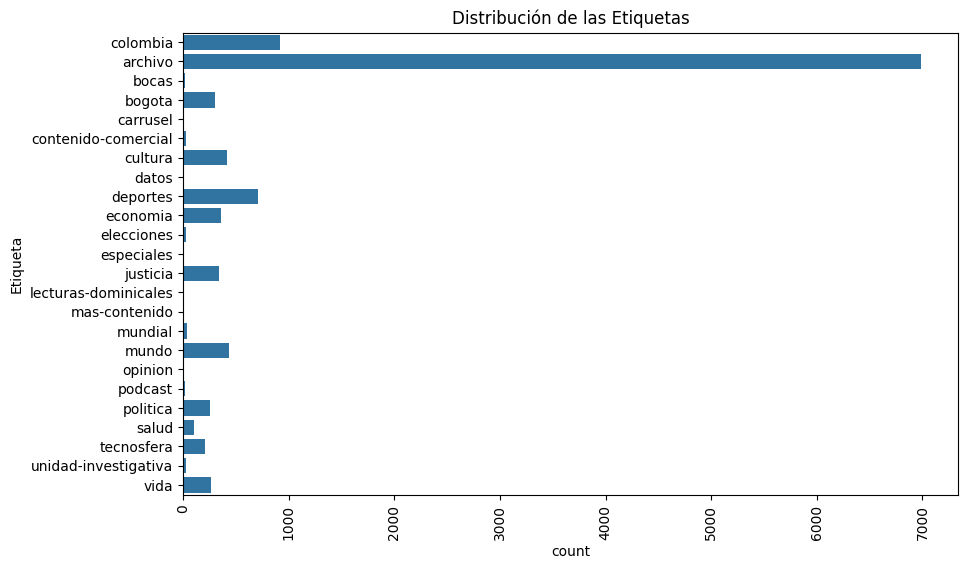

In [15]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(data['Etiqueta'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.


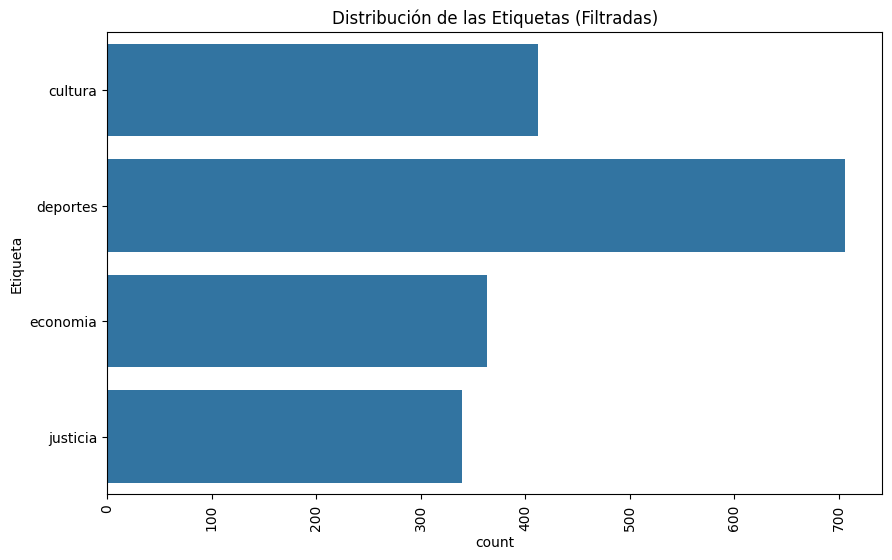

In [16]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()



### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a minúsculas para uniformidad.
- Eliminar puntuación y números para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [4]:
!pip install keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [32]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf
import re
# Descargar recursos de NLTK
#nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    #text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    nuevo_texto = re.sub("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}" , ' ', text) #Eliminación de correos electrónicos
    nuevo_texto = re.sub("[#|@](\w+)" , ' ', text) #Eliminación de etiquetas de tweets, instagram y facebook
    nuevo_texto = re.sub('https\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('www\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "www")
    nuevo_texto = re.sub("(?<!www\.)([\w-]+\.[\w-]+)"  , ' ', nuevo_texto) #Eliminación de paginas web que no comienzan con wwww
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\”\\–\\‘\\’\\¿\\¡\\´\\ª\\—\\´\\£\\«\\»\\©\\®\\°\\·\\…\\•\\¼\\½\\ª]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto) #Eliminación de numeros
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)# Eliminación de espacios en blanco múltiples
    tokens = word_tokenize(nuevo_texto)
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)

# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data_filtrada.to_csv('data_filtrada.csv', index=False)

In [34]:
# prompt: quiero crear un dataframe a partir de data_filtrada['contenido_preprocesado'], que contenga las columnas: etiqueta, el token, el lema y el pos a partir de spacy para español.

#!pip install spacy
#!python -m spacy download es_core_news_sm

import spacy
import pandas as pd

# Load the spaCy Spanish language model
nlp = spacy.load("es_core_news_sm")

# Load your preprocessed data
data_filtrada = pd.read_csv('data_filtrada.csv')

# Create an empty list to store the results
results = []

# Iterate over the preprocessed content
for index, row in data_filtrada.iterrows():
    texto = row['contenido_preprocesado']
    etiqueta = row['Etiqueta']
    doc = nlp(texto)
    for token in doc:
        results.append([etiqueta, token.text, token.lemma_, token.pos_])

# Create the DataFrame
df_spacy = pd.DataFrame(results, columns=['etiqueta', 'token', 'lema', 'pos'])

# Print or save the DataFrame
print(df_spacy.head())
# df_spacy.to_csv('spacy_results.csv', index=False)

  etiqueta      token       lema   pos
0  cultura      citas       cita  NOUN
1  cultura   crímenes     crímén   ADJ
2  cultura  violencia  violencia  NOUN
3  cultura     sexual     sexual   ADJ
4  cultura  cometidos   cometido  NOUN


In [40]:
#!pip install spacy
#!python -m spacy download es_core_news_sm
import spacy
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the spaCy Spanish language model
nlp = spacy.load("es_core_news_sm")

# Load your preprocessed data
data_filtrada = pd.read_csv('data_filtrada.csv')

# Create an empty list to store the results
results = []

# Iterate over the preprocessed content
for index, row in data_filtrada.iterrows():
    texto = row['contenido_preprocesado']
    etiqueta = row['Etiqueta']
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    results.append([etiqueta, lemas])

# Create the DataFrame
df_spacy = pd.DataFrame(results, columns=['etiqueta', 'lemas'])

# Tokenización consistente de los lemas
lemas_list = df_spacy['lemas'].tolist()
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(lemas_list)
sequences = tokenizer.texts_to_sequences(lemas_list)

# Padding de las secuencias
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
y = df_spacy['etiqueta'].values

# Convertir las secuencias padded de vuelta a lemas para visualizar el padding
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_lemmas(sequence):
    return [reverse_word_map.get(idx, '<PAD>') for idx in sequence]

padded_lemmas = [sequence_to_lemmas(seq) for seq in X]

# Crear DataFrame para visualizar el padding de los lemas
df_padded_lemmas = pd.DataFrame(padded_lemmas)
df_padded_lemmas['etiqueta'] = y

# Imprimir los primeros registros para verificar
print(df_padded_lemmas.head())

        0            1           2             3          4         5  \
0    cita        <OOV>   violencia        sexual   cometido  interior   
1  motivo  celebración         año     enseñanza      danza  oriental   
2  cuadro        busto       mujer       artista    español     pablo   
3   <OOV>          art  organizado  barranquilla  fundación     <OOV>   
4   <OOV>        <OOV>       <OOV>      filósofo     doctor     denis   

          6       7        8        9  ...   2815   2816   2817   2818   2819  \
0     grupo  armado    silla    vacío  ...  <PAD>  <PAD>  <PAD>  <PAD>  <PAD>   
1  colombia  llegar    <OOV>    <OOV>  ...  <PAD>  <PAD>  <PAD>  <PAD>  <PAD>   
2     <OOV>  robado    hacer   veinte  ...  <PAD>  <PAD>  <PAD>  <PAD>  <PAD>   
3  preparar  décimo  tercero  edición  ...  <PAD>  <PAD>  <PAD>  <PAD>  <PAD>   
4     <OOV>  premio    nobel    <OOV>  ...  <PAD>  <PAD>  <PAD>  <PAD>  <PAD>   

    2820   2821   2822   2823 etiqueta  
0  <PAD>  <PAD>  <PAD>  <PAD>  cu

In [41]:
df_padded_lemmas.to_csv('df_padded_lemmas.csv', index=False)

In [35]:
 df_spacy.to_csv('spacy_results.csv', index=False)

In [ ]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_spacy['lema'])
sequences = tokenizer.texts_to_sequences(data_filtrada['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 6945,  2186,   482,  1262,  3351,  1632,   145, 20253, 20254,
          278, 20255, 11985,    64, 20256,    18,  2146, 14763,  6729,
         6268, 20257, 11985,    85,  8990, 20258,  1269, 20259,  1536,
          727,  1262,    72,  1262,  2591,  4937,  4937,  1262,  1458,
        20260,  5223,  2281,  1362,   679,  5223, 11986,  1496, 20261,
          155,   144,   399,   680,  5223,    58,   399,  3798,   695,
          747,  1019,    28,     1,    51,    36,  1571,    45, 19341,
           19,    29,    12,    26,  4359,     1,    43,    31,  7020,
            2,    16,    30,  4359,     1,    46,    15,    34,    24,
        19234,    49,    22,     2,     1, 11380,    44,    41,    27,
            3,    32,     1,    42,    17,    21, 32052,    50,     3,
           40],
       [ 8034,  8035,    54,  6945, 20280,  8034,   692,  1106,  8035,
          832,  1753,   871,  1689,  2187,   380,   187,   135,    82,
         1762,   112,   401,   331, 22599, 20267,  3962,   96

### Ejercicio 4: División del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la división sea aleatoria pero mantenga una proporción similar de las categorías en ambos conjuntos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
df_filtered['Etiqueta_codificada'] = label_encoder.fit_transform(df_filtered['etiqueta'])
max_len = 100
# Assuming your text data is in a column named 'contenido_preprocesado' or 'lema'
# Replace 'text_data' with the actual column name containing your text data
# X = padded_sequences  # Or X = df_filtered['lema'] depending on the column you want to use
# The error was here, padded_sequences only had the first 4 tokenized sequences.
# We need to use the entire tokenized dataset.
X = padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# División del conjunto de datos
# Ensure X has the same number of samples as df_filtered['Etiqueta_codificada']
X_train, X_val, y_train, y_val = train_test_split(X, df_filtered['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)

<ipython-input-34-1b554c1cd05e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Etiqueta_codificada'] = label_encoder.fit_transform(df_filtered['etiqueta'])


ValueError: Found input variables with inconsistent numbers of samples: [4, 561442]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)


ValueError: Found input variables with inconsistent numbers of samples: [561442, 1820]

## Ejercicio 5: Construcción y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categorías especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [ ]:
from keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_lstm.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


## Ejercicio 7: Comparación de Modelos y Análisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en términos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisión y la pérdida de los modelos RNN y LSTM en el conjunto de datos de validación.
- Calcula otras métricas de evaluación como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en función de los resultados obtenidos.

In [ ]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparación entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.
